In [1]:
import quandl
import pandas_datareader as pdr

import pandas as pd
import yfinance as yf
import numpy as np

from datetime import date

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import copy

from tqdm import tqdm

c:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
#First one is the Federal Funds Effective Rate
#Other are all cryptocurrencies which are available on FRED: Bitcoin, Bitcoin Cash, Litecoin and Ethereum respectevly

FRED_INDICATORS = ['FEDFUNDS', 'CBBTCUSD', 'CBBCHUSD', 'CBLTCUSD', 'CBETHUSD']

In [8]:
end = date.today()
start = date(year=end.year-5, month=end.month, day=end.day)
macro_indicators = dict()
tq_fred = tqdm(FRED_INDICATORS)

# get the stats from FRED database (with Pandas Datareader API)

tq_fred.set_description('Downloading stats from FRED:')
for indicator in tq_fred:

  # tq_fred.set_description(indicator)
  # macro_indicators[indicator] = pdr.DataReader(indicator, "fred", start=start, timeout=90)
  
 macro_indicators[indicator] = pdr.fred.FredReader(indicator, start=start, timeout=90).read()

In [9]:
macro_indicators['FEDFUNDS']

,FEDFUNDS
DATE,
2017-12-01,1.30
2018-01-01,1.41
2018-02-01,1.42
2018-03-01,1.51
2018-04-01,1.69
2018-05-01,1.70
2018-06-01,1.82
2018-07-01,1.91
2018-08-01,1.91


In [10]:
for i,value in enumerate(macro_indicators.keys()):
  if i%6==0:
    print('\n')
  print(value, end =", ")



FEDFUNDS, CBBTCUSD, CBBCHUSD, CBLTCUSD, CBETHUSD, 

In [11]:
macro_indicators['CBBTCUSD']

,CBBTCUSD
DATE,
2017-11-15,7294.00
2017-11-16,7838.53
2017-11-17,7714.71
2017-11-18,7777.01
2017-11-19,8031.82
...,...
2022-11-10,17573.15
2022-11-11,16997.14
2022-11-12,16777.73


In [13]:


macro_indicators['CBBTCUSD'].tail()

,CBBTCUSD
DATE,
2022-11-10,17573.15
2022-11-11,16997.14
2022-11-12,16777.73
2022-11-13,16290.62
2022-11-14,16576.49


<AxesSubplot:title={'center':'Fed funds rate over 5 years'}, xlabel='DATE'>

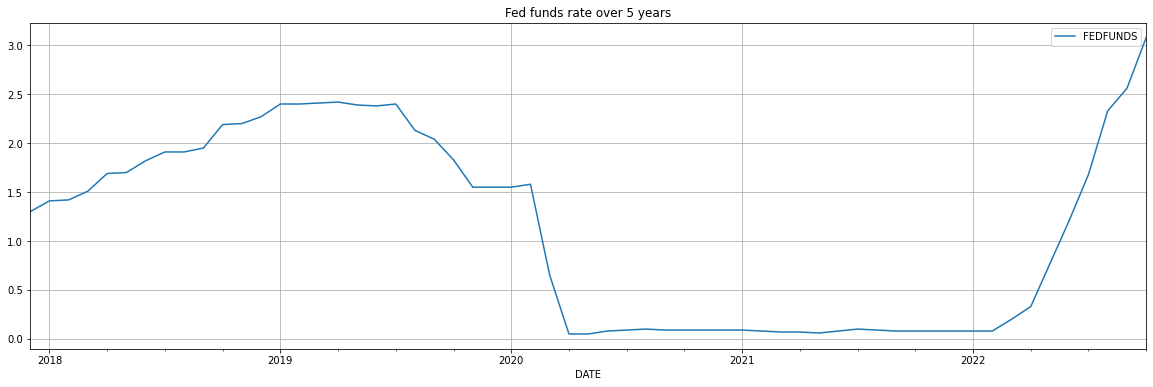

In [14]:
macro_indicators['FEDFUNDS'].plot.line(figsize=(20,6), grid = True, title='Fed funds rate over 5 years')

<AxesSubplot:title={'center':'Bitcoin price over 5 years'}, xlabel='DATE'>

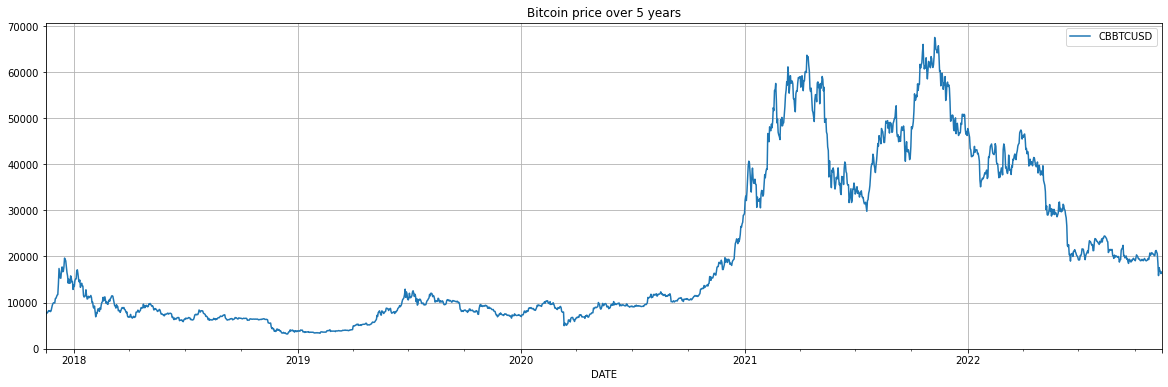

In [15]:
macro_indicators['CBBTCUSD'].plot.line(figsize=(20,6), grid = True, title='Bitcoin price over 5 years')

<AxesSubplot:title={'center':'Bitcoin cash price over 5 years'}, xlabel='DATE'>

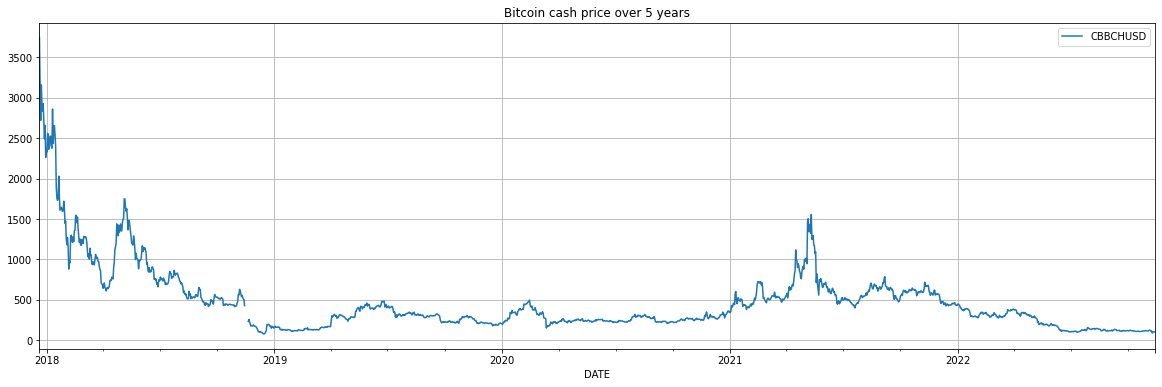

In [16]:
macro_indicators['CBBCHUSD'].plot.line(figsize=(20,6), grid = True, title='Bitcoin cash price over 5 years')

<AxesSubplot:title={'center':'Litecoin price over 5 years'}, xlabel='DATE'>

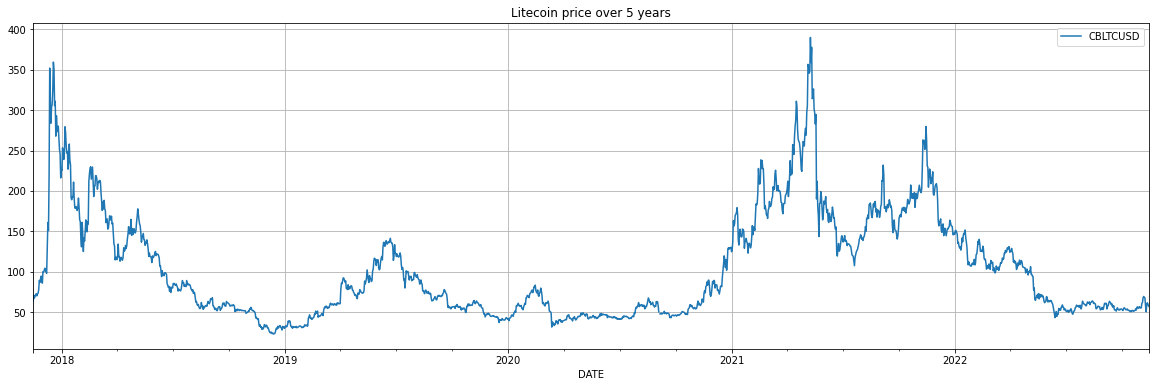

In [17]:
macro_indicators['CBLTCUSD'].plot.line(figsize=(20,6), grid = True, title='Litecoin price over 5 years')

<AxesSubplot:title={'center':'Etherium price over 5 years'}, xlabel='DATE'>

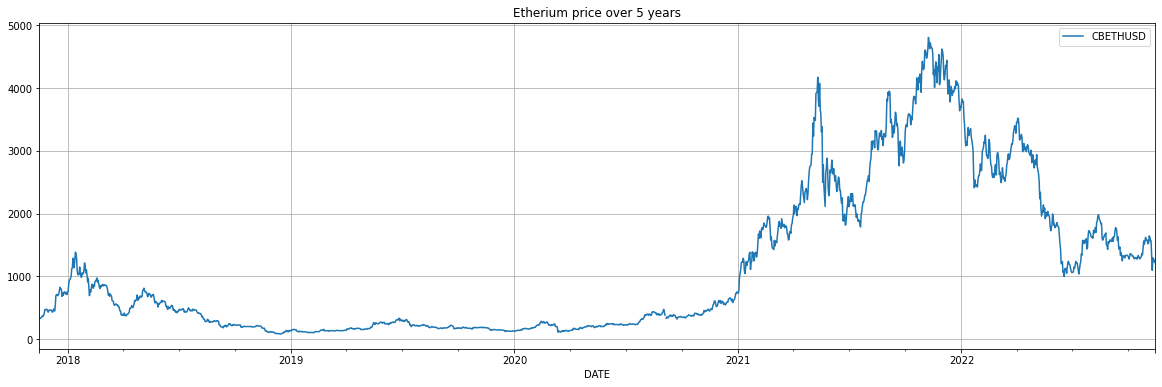

In [18]:
macro_indicators['CBETHUSD'].plot.line(figsize=(20,6), grid = True, title='Etherium price over 5 years')

In [19]:
macro_indicators.keys()

dict_keys(['FEDFUNDS', 'CBBTCUSD', 'CBBCHUSD', 'CBLTCUSD', 'CBETHUSD'])

In [20]:
# Total indicators from FRED:
len(macro_indicators.keys())

5

In [ ]:
# need to have a deep copy of macro indicators to make local transformations not changing the datarepo
macro_indicators_dict = copy.deepcopy(macro_indicators)